## Flipkart Laptop Data
### Objective of the analysis
+ Gain business insights on product pricing

### Importing libraries

In [794]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [795]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### Importing Data

In [796]:
df = pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [797]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [798]:
df.shape

(720, 4)

In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### Typecasting 

In [800]:
#Typecasting on the MRP column
df['MRP'] = df['MRP'].astype(str).str.replace('[₹,]', '', regex=True)
df['MRP'] = df['MRP'].astype('int64')

In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    int64  
 3   Feature  720 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.6+ KB


In [802]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


### Null Values

In [803]:
df.isnull().any()

Product    False
Rating      True
MRP        False
Feature    False
dtype: bool

### Feature engineering AND feature extraction

In [804]:
#Removing Rating column as it will not help in decieding the price of a laptop
#making chnges in the copied column 
df.drop(columns='Rating',inplace=True)

In [805]:
df['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

### Feature extraction
<h5> Extract the company name from the product column and extract all the necessary 
features from the feature column that will help in 
determining the price of the product.</h5>

In [806]:
pattern = r'(Lenovo|ASUS|HP|DELL|Redmi|realme|acer|APPLE|MSI|Vaio|Ultimus|Infinix|RedmiBook|SAMSUNG|GIGABYTE|Nokia|ALIENWAR)'
df['Company'] = [re.search(pattern, x).group() for x in df['Product']]

In [807]:
df

,Product,MRP,Feature,Company
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS


In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  720 non-null    object
 1   MRP      720 non-null    int64 
 2   Feature  720 non-null    object
 3   Company  720 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.6+ KB


In [809]:
# extract Operating System
df['OS'] = df['Feature'].str.extract('(Mac\s|Windows\s\d+\s)')
df.head()

,Product,MRP,Feature,Company,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11


In [810]:
# extract Processor 
df['Processor'] = df['Feature'].str.extract('(^.+?(?= Processor))')

In [811]:
df['Processor'] = df['Processor'].apply(lambda x:" ".join(x.split()[0:3]))

In [812]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [813]:
df['Processor'] = df['Processor'].apply(fetch_processor)
df.head(10)

,Product,MRP,Feature,Company,OS,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,HP,Windows 11,Intel Core i3
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,38990,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL,Windows 11,AMD Processor
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,39990,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Redmi,Windows 11,Intel Core i5
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,Windows 10,AMD Processor
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,44990,AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...,ASUS,Windows 11,AMD Processor


In [814]:
# extract RAM type
df['RAM_type'] = df['Feature'].str.extract('(DDR[345]?|LPDDR[34x5]?)')
df.head()

,Product,MRP,Feature,Company,OS,Processor,RAM_type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5,DDR4


In [815]:
# extract RAM_size
df['RAM'] = df['Product'].str.extract('(\d+ GB)')

In [816]:
df['RAM'] = df['RAM'].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int32')
df.head()

,Product,MRP,Feature,Company,OS,Processor,RAM_type,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5,DDR4,8


In [817]:
# extract Memory
df['Memory'] = df['Feature'].str.extract('(\d+\s*(?:GB|TB)\s*(?:HDD|SSD))')
df.head()

,Product,MRP,Feature,Company,OS,Processor,RAM_type,RAM,Memory
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3,DDR4,8,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor,DDR4,8,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5,DDR4,8,512 GB SSD


In [818]:
df['Display(cm)'] = df['Feature'].str.extract('(\d+(?:\.\d+) cm)')
df.head()

,Product,MRP,Feature,Company,OS,Processor,RAM_type,RAM,Memory,Display(cm)
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,256 GB SSD,35.56 cm
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62 cm
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62 cm
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor,DDR4,8,512 GB SSD,39.62 cm
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5,DDR4,8,512 GB SSD,39.62 cm


In [819]:
df['Display(cm)'] = df['Display(cm)'].str.replace('cm','')
df['Display(cm)'] = df['Display(cm)'].astype('float64')
df.head()

,Product,MRP,Feature,Company,OS,Processor,RAM_type,RAM,Memory,Display(cm)
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,256 GB SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD Processor,DDR4,8,512 GB SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel Core i5,DDR4,8,512 GB SSD,39.62


In [820]:
'''All necessary are extracted from the product and Feature columns 
now we can drop the column so that we can focus on main Feature'''
df.drop(columns=['Product','Feature'],inplace=True)

In [821]:
df.head()

,MRP,Company,OS,Processor,RAM_type,RAM,Memory,Display(cm)
0,36990,Lenovo,Windows 11,Intel Core i3,DDR4,8,256 GB SSD,35.56
1,39990,Lenovo,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62
2,32990,ASUS,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62
3,49990,HP,Windows 10,AMD Processor,DDR4,8,512 GB SSD,39.62
4,49990,ASUS,Windows 11,Intel Core i5,DDR4,8,512 GB SSD,39.62


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

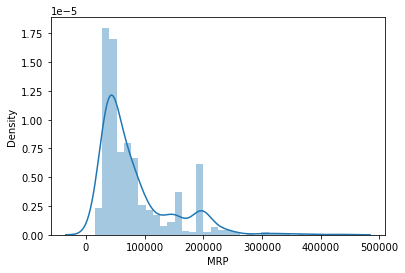

In [822]:
sns.distplot(df['MRP'])

<AxesSubplot:>

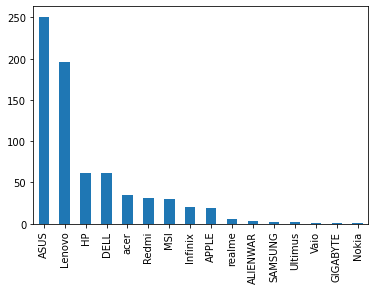

In [823]:
df['Company'].value_counts().plot(kind='bar')

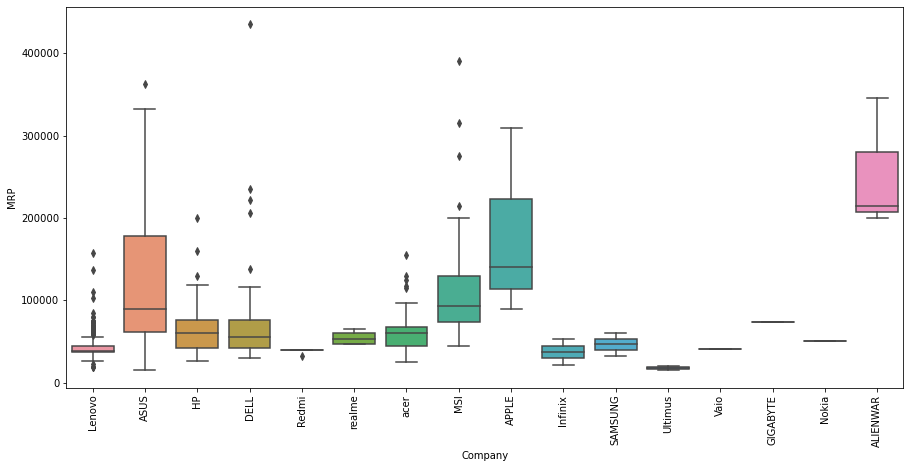

In [824]:
# Visualizing relation between Company and MRP
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=df['Company'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Display(cm)', ylabel='Density'>

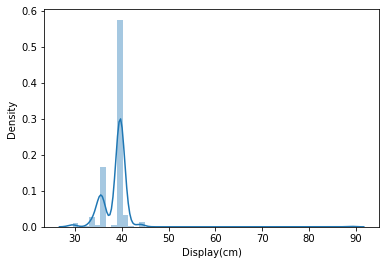

In [825]:
sns.distplot(df['Display(cm)'])

<AxesSubplot:xlabel='Display(cm)', ylabel='MRP'>

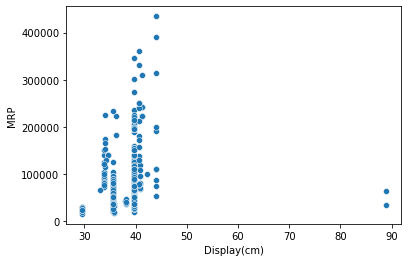

In [826]:
sns.scatterplot(x=df['Display(cm)'],y=df['MRP'])

<AxesSubplot:>

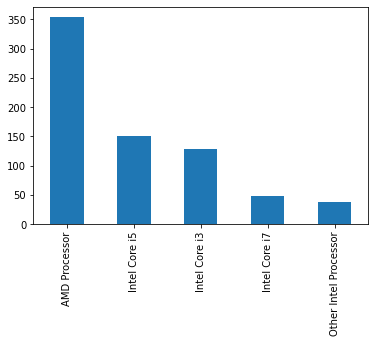

In [827]:
df['Processor'].value_counts().plot(kind='bar')

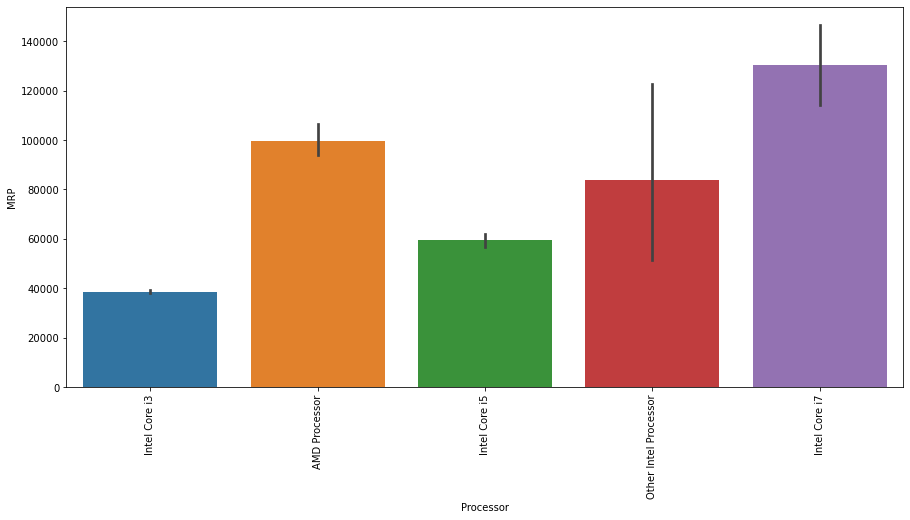

In [828]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['Processor'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()


<AxesSubplot:>

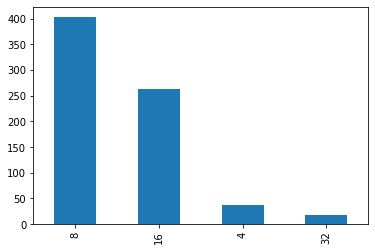

In [829]:
df['RAM'].value_counts().plot(kind='bar')

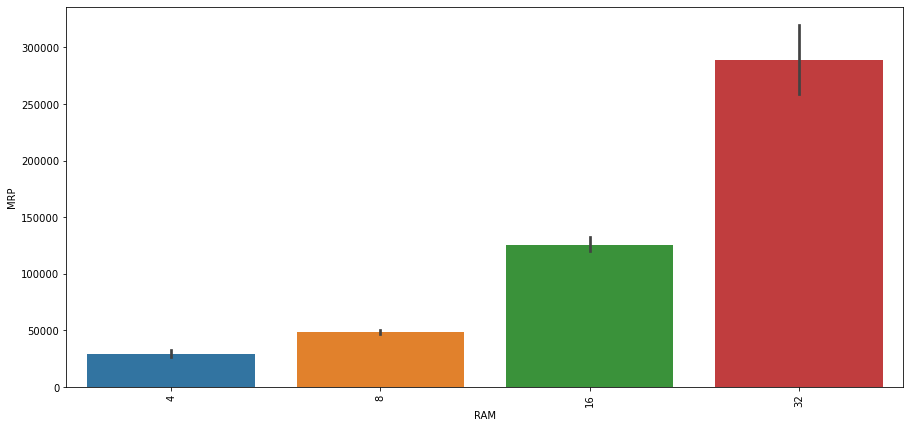

In [830]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['RAM'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [831]:
df['Memory'].value_counts()

512 GB SSD    372
1 TB SSD      176
256 GB SSD     96
1 TB HDD       42
128 GB SSD      8
2 TB SSD        7
256GB SSD       4
512GB SSD       3
256 GB HDD      1
1TB HDD         1
Name: Memory, dtype: int64

In [832]:
df['Memory'].unique()

array(['256 GB SSD', '512 GB SSD', '256GB SSD', '1 TB SSD', '1 TB HDD',
       '256 GB HDD', '512GB SSD', nan, '1TB HDD', '128 GB SSD',
       '2 TB SSD'], dtype=object)

In [833]:
df['Memory'][:-1]

0      256 GB SSD
1      512 GB SSD
2      512 GB SSD
3      512 GB SSD
4      512 GB SSD
          ...    
714    512 GB SSD
715           NaN
716    512 GB SSD
717      1 TB SSD
718    512 GB SSD
Name: Memory, Length: 719, dtype: object

In [834]:
# replace nan values with 0
df['Memory'].fillna(value=0, inplace=True)
# convert 1TB to 1000GB
df['Memory'] = df['Memory'].str.replace('1 TB', '1000 GB').str.replace('2 TB', '2000 GB').str.replace('1TB', '1000GB')

In [835]:
# separate HDD and SSD into two columns
df['HDD'] = df['Memory'].str.extract(r'(\d+\s*(?:GB|TB)?)(?=.*\sHDD)', expand=True)[0].str.strip()
df['SSD'] = df['Memory'].str.extract(r'(\d+\s*(?:GB|TB)?)(?=.*\sSSD)', expand=True)[0].str.strip()

In [836]:
df.head(30)

,MRP,Company,OS,Processor,RAM_type,RAM,Memory,Display(cm),HDD,SSD
0,36990,Lenovo,Windows 11,Intel Core i3,DDR4,8,256 GB SSD,35.56,NaN,256 GB
1,39990,Lenovo,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62,NaN,512 GB
2,32990,ASUS,Windows 11,Intel Core i3,DDR4,8,512 GB SSD,39.62,NaN,512 GB
3,49990,HP,Windows 10,AMD Processor,DDR4,8,512 GB SSD,39.62,NaN,512 GB
4,49990,ASUS,Windows 11,Intel Core i5,DDR4,8,512 GB SSD,39.62,NaN,512 GB
5,36990,HP,Windows 11,Intel Core i3,DDR4,8,256 GB SSD,35.56,NaN,256 GB
6,38990,DELL,Windows 11,AMD Processor,DDR4,8,256GB SSD,39.62,NaN,256GB
7,39990,Redmi,Windows 11,Intel Core i5,DDR4,8,512 GB SSD,39.62,NaN,512 GB
8,46990,realme,Windows 10,AMD Processor,DDR4,8,256 GB SSD,35.56,NaN,256 GB
9,44990,ASUS,Windows 11,AMD Processor,DDR4,16,512 GB SSD,35.56,NaN,512 GB


In [837]:
df['HDD'] = df['HDD'].str.replace('GB', '')
df['SSD'] = df['SSD'].str.replace('GB', '')

In [838]:
df['HDD'].fillna(value=0, inplace=True)

In [839]:
df['SSD'].fillna(value=0, inplace=True)

In [840]:
df['SSD'].unique()

array(['256 ', '512 ', '256', '1000 ', 0, '512', '128 ', '2000 '],
      dtype=object)

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MRP          720 non-null    int64  
 1   Company      720 non-null    object 
 2   OS           709 non-null    object 
 3   Processor    720 non-null    object 
 4   RAM_type     708 non-null    object 
 5   RAM          720 non-null    int32  
 6   Memory       710 non-null    object 
 7   Display(cm)  720 non-null    float64
 8   HDD          720 non-null    object 
 9   SSD          720 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 53.6+ KB


In [842]:
df['HDD'] = df['HDD'].astype('int64')
df['SSD'] = df['SSD'].astype('int64')

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MRP          720 non-null    int64  
 1   Company      720 non-null    object 
 2   OS           709 non-null    object 
 3   Processor    720 non-null    object 
 4   RAM_type     708 non-null    object 
 5   RAM          720 non-null    int32  
 6   Memory       710 non-null    object 
 7   Display(cm)  720 non-null    float64
 8   HDD          720 non-null    int64  
 9   SSD          720 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 53.6+ KB


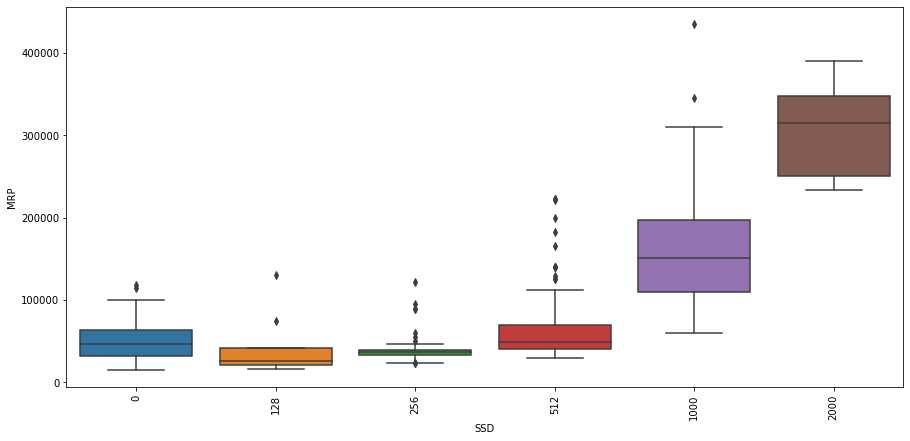

In [844]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=df['SSD'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

In [845]:
df.drop(columns='Memory',inplace=True)

In [846]:
df.head()

,MRP,Company,OS,Processor,RAM_type,RAM,Display(cm),HDD,SSD
0,36990,Lenovo,Windows 11,Intel Core i3,DDR4,8,35.56,0,256
1,39990,Lenovo,Windows 11,Intel Core i3,DDR4,8,39.62,0,512
2,32990,ASUS,Windows 11,Intel Core i3,DDR4,8,39.62,0,512
3,49990,HP,Windows 10,AMD Processor,DDR4,8,39.62,0,512
4,49990,ASUS,Windows 11,Intel Core i5,DDR4,8,39.62,0,512


In [847]:
df['Processor'].value_counts()

AMD Processor            354
Intel Core i5            150
Intel Core i3            129
Intel Core i7             49
Other Intel Processor     38
Name: Processor, dtype: int64

In [848]:
df['GPU_brand'] = df['Processor'].apply(lambda x:x.split()[0])

In [849]:
df['GPU_brand'].value_counts()

AMD      354
Intel    328
Other     38
Name: GPU_brand, dtype: int64

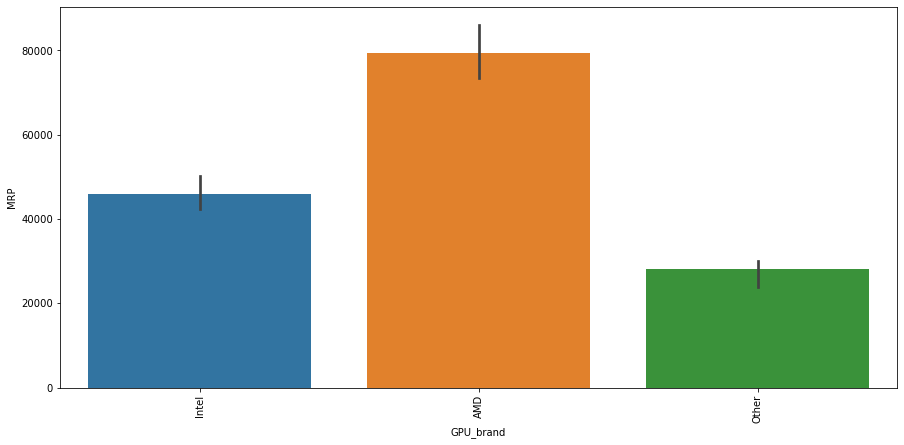

In [850]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df['GPU_brand'],y=df['MRP'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [851]:
df = df.drop(columns='Processor')

In [852]:
df.isnull().sum()

MRP             0
Company         0
OS             11
RAM_type       12
RAM             0
Display(cm)     0
HDD             0
SSD             0
GPU_brand       0
dtype: int64

In [853]:
df = df.dropna()

In [854]:
df.corr()['MRP']

MRP            1.000000
RAM            0.810340
Display(cm)    0.140607
HDD           -0.096924
SSD            0.758723
Name: MRP, dtype: float64

<AxesSubplot:>

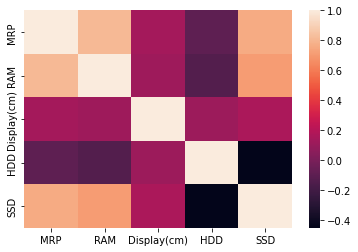

In [855]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MRP', ylabel='Density'>

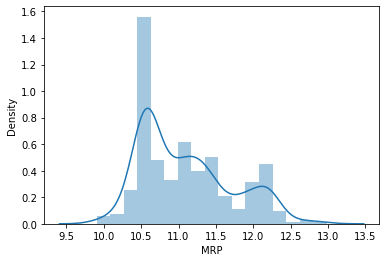

In [856]:
sns.distplot(np.log(df['MRP']))

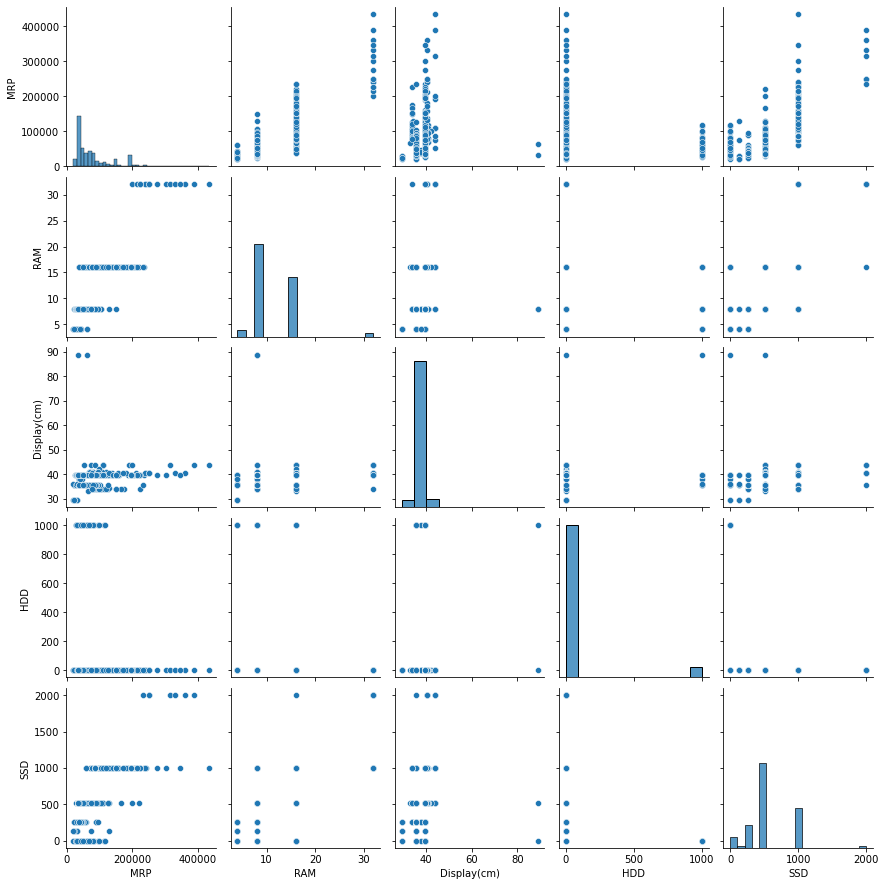

In [857]:
sns.pairplot(df)

In [858]:
X = df.drop(columns=['MRP'])
y = np.log(df['MRP'])

In [859]:
X

,Company,OS,RAM_type,RAM,Display(cm),HDD,SSD,GPU_brand
0,Lenovo,Windows 11,DDR4,8,35.56,0,256,Intel
1,Lenovo,Windows 11,DDR4,8,39.62,0,512,Intel
2,ASUS,Windows 11,DDR4,8,39.62,0,512,Intel
3,HP,Windows 10,DDR4,8,39.62,0,512,AMD
4,ASUS,Windows 11,DDR4,8,39.62,0,512,Intel
...,...,...,...,...,...,...,...,...
714,HP,Windows 10,DDR4,16,39.62,0,512,AMD
716,Lenovo,Windows 11,DDR4,8,39.62,0,512,AMD
717,ASUS,Windows 11,DDR5,16,39.62,0,1000,AMD
718,ASUS,Windows 11,LPDDR5,16,35.56,0,512,Intel


In [860]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
714    11.407565
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 697, dtype: float64

In [861]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [862]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [863]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [864]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Linear Regression

In [865]:
'''# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2 = LinearRegression()

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
'''

"# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])\n    ])\n\nstep2 = LinearRegression()\n\n# define the pipeline\npipe = Pipeline(steps=[\n    ('step1', step1),\n    ('step2', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))\n"

Ridge Regression

In [866]:
"""# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2=Ridge(alpha=10)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))"""

"# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])\n    ])\n\nstep2=Ridge(alpha=10)\n\n# define the pipeline\npipe = Pipeline(steps=[\n    ('step1', step1),\n    ('step2', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))"

Lasso Regression

In [867]:
"""# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2=Lasso(alpha=0.001)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))"""

"# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])\n    ])\n\nstep2=Lasso(alpha=0.001)\n\n# define the pipeline\npipe = Pipeline(steps=[\n    ('step1', step1),\n    ('step2', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))"

KNN

In [868]:
"""# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2=KNeighborsRegressor(n_neighbors=3)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))"""

"# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])\n    ])\n\nstep2=KNeighborsRegressor(n_neighbors=3)\n\n# define the pipeline\npipe = Pipeline(steps=[\n    ('step1', step1),\n    ('step2', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))"

Decision Tree

In [869]:
"""# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2=DecisionTreeRegressor(max_depth=8)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))"""

"# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])\n    ])\n\nstep2=DecisionTreeRegressor(max_depth=8)\n\n# define the pipeline\npipe = Pipeline(steps=[\n    ('step1', step1),\n    ('step2', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))"

Random Forest

In [870]:
"""""# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ])

step2=RandomForestRegressor(n_estimators=100, random_state=3,max_samples=0.5,
                            max_features=0.75,max_depth=15)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))"""

'""# define the column transformer\nstep1 = ColumnTransformer(\n    transformers=[\n        (\'num\', StandardScaler(), [\'RAM\', \'Display(cm)\',\'SSD\',\'HDD\']),\n        (\'cat\', OneHotEncoder(handle_unknown=\'ignore\'), [\'Company\', \'OS\',\'RAM_type\',\'GPU_brand\'])\n    ])\n\nstep2=RandomForestRegressor(n_estimators=100, random_state=3,max_samples=0.5,\n                            max_features=0.75,max_depth=15)\n\n# define the pipeline\npipe = Pipeline(steps=[\n    (\'step1\', step1),\n    (\'step2\', step2)])\n\n# fit the pipeline to the training data\npipe.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = pipe.predict(X_test)\n\nprint(\'R2 score\',r2_score(y_test,y_pred))\nprint(\'MAE\',mean_absolute_error(y_test,y_pred))'

Gradient Boost

In [871]:
# define the column transformer
step1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['RAM', 'Display(cm)','SSD','HDD']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'OS','RAM_type','GPU_brand'])
    ],remainder ='passthrough')

step2=GradientBoostingRegressor(n_estimators=500)

# define the pipeline
pipe = Pipeline(steps=[
    ('step1', step1),
    ('step2', step2)])

# fit the pipeline to the training data
pipe.fit(X_train, y_train)

# make predictions on the test data
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.905830835549653
MAE 0.1402813502416123


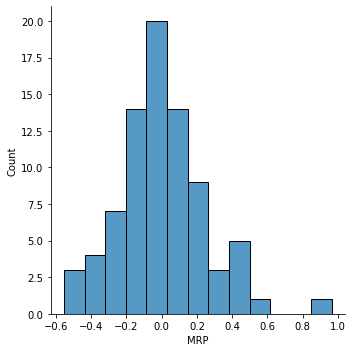

In [872]:
sns.displot(diff)

In [873]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [874]:
df

,MRP,Company,OS,RAM_type,RAM,Display(cm),HDD,SSD,GPU_brand
0,36990,Lenovo,Windows 11,DDR4,8,35.56,0,256,Intel
1,39990,Lenovo,Windows 11,DDR4,8,39.62,0,512,Intel
2,32990,ASUS,Windows 11,DDR4,8,39.62,0,512,Intel
3,49990,HP,Windows 10,DDR4,8,39.62,0,512,AMD
4,49990,ASUS,Windows 11,DDR4,8,39.62,0,512,Intel
...,...,...,...,...,...,...,...,...,...
714,90000,HP,Windows 10,DDR4,16,39.62,0,512,AMD
716,73490,Lenovo,Windows 11,DDR4,8,39.62,0,512,AMD
717,194990,ASUS,Windows 11,DDR5,16,39.62,0,1000,AMD
718,125990,ASUS,Windows 11,LPDDR5,16,35.56,0,512,Intel


In [875]:
X_train

,Company,OS,RAM_type,RAM,Display(cm),HDD,SSD,GPU_brand
106,MSI,Windows 10,DDR4,16,39.62,0,1000,Intel
309,HP,Windows 10,DDR4,8,39.62,1000,0,Intel
194,acer,Windows 11,DDR4,16,39.62,0,512,Intel
105,ASUS,Windows 11,DDR4,16,39.62,0,512,AMD
207,ASUS,Windows 11,DDR4,16,39.62,0,1000,AMD
...,...,...,...,...,...,...,...,...
235,ASUS,Windows 11,DDR4,8,35.56,0,256,Other
674,HP,Windows 10,DDR4,8,39.62,0,512,AMD
714,HP,Windows 10,DDR4,16,39.62,0,512,AMD
307,ASUS,Windows 11,DDR5,16,39.62,0,1000,AMD
